# Unit 5 - Financial Planning

In [1]:
'''
- I will be developing a prototype application to demo in the next credit union assembly. (financial analysis tools)

- The first will be a personal finance planner that will allow users to visualize their savings composed by investments
in shares and cryptocurrencies to assess if they have enough money as an emergency fund.

- The second tool will be a retirement planning tool that will use the Alpaca API to fetch historical closing prices for 
a retirement portfolio composed of stocks and bonds, then will run Monte Carlo simulations to project the portfolio performance at 30 years. 
then will then use the Monte Carlo data to calculate the expected portfolio returns given a specific initial investment amount.

- The optional task will be running Monte Carlo simulations to project the portfolio performance at 5 and 10 years to see what is required for early retirement.

-- The Process:
-- Part 1 Personal Finance Planner
1. Set initial imports for whole code
2. Load environment variables 
3. Get URL from alternative api for BTC and ETH, and set variables with holdings of those coins
4. Request.get from both URL and single out the price of both coins into seperate variables for current price
5. Then will print the total balance of our holdings
6. Next need to collect investment data with Alpaca api
7. First will set variables for current amount of shares in both
8. Will get API keys and check if they loaded correctly 
9. Create an api object 
10. Then will set all variables for the alpaca.get_barset then run and print it 
11. Put the latest close price of both into sperate variables and print to view
12. Next is savings health analysis, will create a new dataframe with both the crypto and share closing prices combined
13. Will plot in pie chart to see the weights/risk of the portfolio
14. Then will make an if statement to print out whether the portfolios total savings is enough for an emergency fund

-- Part 2 Retirement Planning
1. Then will set all variables for the alpaca.get_barset for SPY and AGG then run and print it 
2. Then will configuring a Monte Carlo simulation to forecast 30 years cumulative returns and print portfolio data 
3. Then run the Monte Carlo simulation 
4. Then plotting Monte Carlo simulation in line plot and save as new variable and also saving image to directory 
5. Then will make a distribution plot with Monte Carlo Simulation will save as new variable and also saving image to directory
6. Retirement analysis, will summarize cumulative returns 
7. Calculate the range of possible outcomes with the upper and lower 95% with out initial investment, print range 
8. Repeat step 7 for a 50% increase in initial investment, print range 

-- Part 3 Optional Challenge - Early Retirement 
1. Repeat part two will just change Monte Carlo Simulation for 5 year analysis and 10 year analysis 
2. Then will also manipulate weights of the portfolio and change initial investments
'''

'\n- I will be developing a prototype application to demo in the next credit union assembly. (financial analysis tools)\n\n- The first will be a personal finance planner that will allow users to visualize their savings composed by investments\nin shares and cryptocurrencies to assess if they have enough money as an emergency fund.\n\n- The second tool will be a retirement planning tool that will use the Alpaca API to fetch historical closing prices for \na retirement portfolio composed of stocks and bonds, then will run Monte Carlo simulations to project the portfolio performance at 30 years. \nthen will then use the Monte Carlo data to calculate the expected portfolio returns given a specific initial investment amount.\n\n- The optional task will be running Monte Carlo simulations to project the portfolio performance at 5 and 10 years to see what is required for early retirement.\n\n-- The Process:\n-- Part 1 Personal Finance Planner\n1. Set initial imports for whole code\n2. Load env

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Loading .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Setting current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs for btc and eth
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetching current BTC price from btc url above with designated varibale 
btc_info = requests.get(btc_url).json()
btc_info

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18898993,
   'total_supply': 18898993,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 49693.0,
     'volume_24h': 19759200536,
     'market_cap': 940662776316,
     'percentage_change_1h': 0.0509055378458542,
     'percentage_change_24h': 2.94585711210592,
     'percentage_change_7d': 1.08062581865416,
     'percent_change_1h': 0.0509055378458542,
     'percent_change_24h': 2.94585711210592,
     'percent_change_7d': 1.08062581865416},
    'CAD': {'price': 63244.2811,
     'volume_24h': 25147534522.1672,
     'market_cap': 1197181515417.37,
     'percent_change_1h': 0.0509055378458542,
     'percent_change_24h': 2.94585711210592,
     'percent_change_7d': 1.08062581865416}},
   'last_updated': 1639319894}},
 'metadata': {'timestamp': 1639319894,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [7]:
# Fetching current ETH price from eth url above with designated variable 
eth_info = requests.get(eth_url).json()
eth_info

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 118709351,
   'total_supply': 118709351,
   'max_supply': 0,
   'quotes': {'USD': {'price': 4040.55,
     'volume_24h': 14370423359,
     'market_cap': 480503083319,
     'percentage_change_1h': -0.132362025820676,
     'percentage_change_24h': 0.603194526011351,
     'percentage_change_7d': -1.48983045752898,
     'percent_change_1h': -0.132362025820676,
     'percent_change_24h': 0.603194526011351,
     'percent_change_7d': -1.48983045752898},
    'CAD': {'price': 5142.407985,
     'volume_24h': 18289237808.9993,
     'market_cap': 611536274140.091,
     'percent_change_1h': -0.132362025820676,
     'percent_change_24h': 0.603194526011351,
     'percent_change_7d': -1.48983045752898}},
   'last_updated': 1639319828}},
 'metadata': {'timestamp': 1639319828,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [8]:
# Getting current price from url and then calculating current value of btc in CAD 
btc_price = btc_info["data"]["1"]["quotes"]["CAD"]["price"]
print(btc_price)
my_btc_value = my_btc * btc_price
print(my_btc_value)

63244.2811
75893.13732


In [9]:
# Getting current price from url and then calculating current value of eth in CAD
eth_price = eth_info["data"]["1027"]["quotes"]["CAD"]["price"]
print(eth_price)
my_eth_value = my_eth * eth_price
print(my_eth_value)

5142.407985
27254.762320499998


In [10]:
# Printing current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $75893.14
The current value of your 5.3 ETH is $27254.76


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Setting the current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [13]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [14]:
# Creating the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [15]:
# Formatting the current date as ISO format
start_date = pd.Timestamp("2018-12-11", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-12-11", tz="America/New_York").isoformat()

# Setting the tickers for the stock and bond
tickers = ["AGG", "SPY"]

# Setting timeframe to '1D' for Alpaca API
timeframe = "1D"

# Getting current closing prices for SPY and AGG using a limit as reqeusted = 1000
agg_spy_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
agg_spy_data.tail(5)

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2021-12-06 00:00:00-05:00  114.98  115.0391  114.6196  114.660  6364620   
2021-12-07 00:00:00-05:00  114.52  114.7100  114.4500  114.475  5783341   
2021-12-08 00:00:00-05:00  114.37  114.3700  114.0500  114.170  7416826   
2021-12-09 00:00:00-05:00  114.28  114.3860  114.1200  114.200  8223995   
2021-12-10 00:00:00-05:00  114.37  114.5100  114.2200  114.240  6263328   

                              SPY                                        
                             open      high       low   close    volume  
time                                                                     
2021-12-06 00:00:00-05:00  456.14  460.7900  453.5600  458.78  88930961  
2021-12-07 00:00:00-05:00  464.41  468.8800  458.6546  468.24  79124909  
2021-12-08 00:00:00-05:00  468.70  470.0000  466.8300  469.54  62917411  
2021-12-09 00:00:00-05:00  468.15  469.6291  466.1400  466.34  54963509  
2021-12-10 00:00:00-05:00  469.23  470.9000  466.5100  470.72  64958435

In [16]:
# Picking AGG and SPY close prices
agg_close_price = agg_spy_data["AGG"]["close"][-1]
spy_close_price = agg_spy_data["SPY"]["close"][-1]

# Printing out AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.24
Current SPY closing price: $470.72


In [17]:
# Calculating the current value of the shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Printing the current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23536.00
The current value of your 200 AGG shares is $22848.00


### Savings Health Analysis

In [18]:
# Setting the monthly household income
monthly_income = 12000

# Consolidating financial assets data
crypto = my_eth_value + my_btc_value
shares = my_agg_value + my_spy_value
tickers_df = ["Crypto", "Shares"]

# Creating savings DataFrame
df_savings = pd.DataFrame(index=[tickers_df])
df_savings['Amount'] = [crypto, shares]
df_savings

# Displaying savings DataFrame
display(df_savings)

,Amount
Crypto,103147.89964
Shares,46384.00000


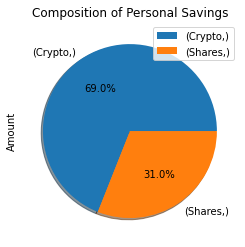

In [19]:
# Plotting savings pie chart
df_savings.plot.pie(subplots = False, autopct= '%1.1f%%', title= "Composition of Personal Savings", y='Amount', shadow=True);

In [20]:
# Setting ideal emergency fund
emergency_fund = monthly_income * 3

# Calculating total amount of savings
total_savings = df_savings["Amount"]["Crypto"] + df_savings["Amount"]["Shares"]

# Validating savings health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough savings for an emergency fund. Your total savings are: ${total_savings}")
if total_savings == emergency_fund:
    print(f"Congratulations! You have reached the recommended savings for an emegency fund. Your total savings are: ${total_savings}")
if total_savings < emergency_fund:
    print("Unfortunately you are short of the recommend amount by $", emergency_fund - total_savings)

Congratulations! You have enough savings for an emergency fund. Your total savings are: $149531.8996405


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Setting the start and end date of five years back from today.

start_date = pd.Timestamp('2016-12-11', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-11', tz='America/New_York').isoformat()

In [22]:
# Getting 5 years' worth of historical data for SPY and AGG
# using a limit=1000 parameter to call the most recent 1000 days of data
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Displaying sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-12-20 00:00:00-05:00  108.75  108.880  108.7059  108.770  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.870  108.7300  108.830  2173058.0   
2017-12-22 00:00:00-05:00  108.82  108.890  108.8100  108.880  2952430.0   
2017-12-26 00:00:00-05:00  108.91  109.010  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.325  109.0200  109.285  1863189.0   

                              SPY                                        
                             open     high      low   close      volume  
time                                                                     
2017-12-20 00:00:00-05:00     NaN      NaN      NaN     NaN         NaN  
2017-12-21 00:00:00-05:00  267.73  268.385  267.300  267.57  34999954.0  
2017-12-22 00:00:00-05:00  267.60  267.635  266.900  267.48  36604044.0  
2017-12-26 00:00:00-05:00  267.06  267.390  266.885  267.17  24888478.0  
2017-12-27 00:00:00-05:00  267.36  267.730  267.010  267.33  32573906.0

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Setting number of simulations
num_sims = 500

# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_agg_spy = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [24]:
# Printing the simulation input data
mc_agg_spy.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-12-20 00:00:00-05:00  108.75  108.880  108.7059  108.770  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.870  108.7300  108.830  2173058.0   
2017-12-22 00:00:00-05:00  108.82  108.890  108.8100  108.880  2952430.0   
2017-12-26 00:00:00-05:00  108.91  109.010  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.325  109.0200  109.285  1863189.0   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-12-20 00:00:00-05:00          NaN     NaN      NaN      NaN     NaN   
2017-12-21 00:00:00-05:00     0.000552  267.73  268.385  267.300  267.57   
2017-12-22 00:00:00-05:00     0.000459  267.60  267.635  266.900  267.48   
2017-12-26 00:00:00-05:00     0.000735  267.06  267.390  266.885  267.17   
2017-12-27 00:00:00-05:00     0.002983  267.36  267.730  267.010  267.33   

                                                    
                               volume daily_return  
time                                                
2017-12-20 00:00:00-05:00         NaN          NaN  
2017-12-21 00:00:00-05:00  34999954.0          NaN  
2017-12-22 00:00:00-05:00  36604044.0    -0.000336  
2017-12-26 00:00:00-05:00  24888478.0    -0.001159  
2017-12-27 00:00:00-05:00  32573906.0     0.000599

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns for agg and spy
mc_agg_spy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\xElio\Desktop\FinTech\week5\Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994195,0.998772,1.004839,0.986726,0.996730,1.013545,1.007889,1.002041,0.999639,1.010432,...,0.988776,1.009364,0.996895,0.986478,1.001286,0.999264,0.995262,1.010136,1.008733,1.000901
2,0.994344,1.002961,1.011887,0.988106,0.997352,1.011846,0.999169,1.002065,0.989300,1.021925,...,0.993694,1.005712,0.996978,0.989828,1.007377,1.000204,0.984992,1.002958,1.000540,1.006531
3,0.985503,0.998780,1.008170,0.992176,0.986412,0.991752,0.999951,1.000568,1.004728,1.021325,...,1.007251,0.989823,0.999606,0.982469,1.011193,0.991266,0.989859,1.010598,1.003334,1.008720
4,0.989317,0.998534,0.994850,0.998651,0.980258,0.979520,0.993152,1.002735,1.011150,1.017750,...,0.983361,0.996817,1.011474,0.979141,1.008365,0.990349,0.991837,1.008962,1.006475,1.022327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,17.250064,28.965590,12.928023,9.635802,15.764705,28.152068,18.328155,8.456876,33.701048,9.429322,...,18.935595,24.729274,16.311911,9.755698,9.443731,25.098893,12.284451,46.363271,17.016043,17.365607
7557,17.336574,29.313401,12.988271,9.503927,15.876614,28.163224,18.364568,8.371714,33.498598,9.399181,...,18.950804,24.497251,16.224098,9.623109,9.443756,25.128900,12.470256,47.194472,16.982336,17.531802
7558,17.466967,29.295116,12.905278,9.489011,15.954357,28.486896,18.425902,8.457909,33.242210,9.318345,...,18.939751,24.743989,16.331449,9.494664,9.424674,25.286006,12.541959,47.521412,16.912092,17.546176
7559,17.496782,29.391313,12.966764,9.484878,16.100538,28.737947,18.563056,8.459526,33.195426,9.201869,...,19.080366,24.850331,16.445980,9.579061,9.375008,25.077445,12.629244,47.423428,16.848623,17.683952


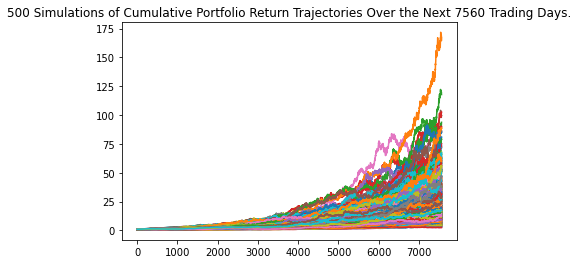

In [67]:
# Plotting simulation outcomes
agg_spy_line_plot = mc_agg_spy.plot_simulation()
# Saving the figure as an image to directory 
agg_spy_line_plot.get_figure().savefig("MC_30year_agg_apy_sim_plot.png", bbox_inches="tight")

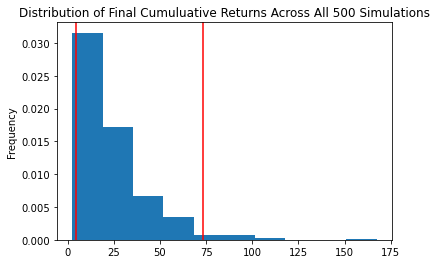

In [68]:
# Plotting probability distribution and confidence intervals
agg_spy_dist_plot = mc_agg_spy.plot_distribution()
# Saving the figure as an image to directory 
agg_spy_dist_plot.get_figure().savefig('MC_30year_dist_plot_agg_spy.png', bbox_inches='tight')

### Retirement Analysis

In [28]:
# Fetching summary statistics from the Monte Carlo simulation results
agg_spy_tbl = mc_agg_spy.summarize_cumulative_return()
# Printing summary statistics
print(agg_spy_tbl)

count           500.000000
mean             24.172014
std              18.834736
min               2.478956
25%              11.448936
50%              18.566169
75%              29.985734
max             167.290088
95% CI Lower      4.623876
95% CI Upper     73.501766
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Setting initial investment
initial_investment = 20000

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
agg_spy_ci_lower = round(agg_spy_tbl[8]*initial_investment,2)
agg_spy_ci_upper = round(agg_spy_tbl[9]*initial_investment,2)

# Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${agg_spy_ci_lower} and ${agg_spy_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $92477.53 and $1470035.33


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Setting initial investment
increased_initial_investment = 20000 * 1.5

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
agg_spy_ci_lower_2 = round(agg_spy_tbl[8]*increased_initial_investment,2)
agg_spy_ci_upper_2 = round(agg_spy_tbl[9]*increased_initial_investment,2)

# Printing results
print(f"There is a 95% chance that an initial investment of ${increased_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${agg_spy_ci_lower_2} and ${agg_spy_ci_upper_2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $138716.29 and $2205052.99


## Optional Challenge - Early Retirement


### Five Years Retirement Option Larger Initial Investments (60K) Same Weights (.40, .60)

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns with same weights .40, .60, er = early retirement
num_sims = 500
mc_er_5years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*5
)
mc_er_5years.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-12-20 00:00:00-05:00  108.75  108.880  108.7059  108.770  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.870  108.7300  108.830  2173058.0   
2017-12-22 00:00:00-05:00  108.82  108.890  108.8100  108.880  2952430.0   
2017-12-26 00:00:00-05:00  108.91  109.010  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.325  109.0200  109.285  1863189.0   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-12-20 00:00:00-05:00          NaN     NaN      NaN      NaN     NaN   
2017-12-21 00:00:00-05:00     0.000552  267.73  268.385  267.300  267.57   
2017-12-22 00:00:00-05:00     0.000459  267.60  267.635  266.900  267.48   
2017-12-26 00:00:00-05:00     0.000735  267.06  267.390  266.885  267.17   
2017-12-27 00:00:00-05:00     0.002983  267.36  267.730  267.010  267.33   

                                                    
                               volume daily_return  
time                                                
2017-12-20 00:00:00-05:00         NaN          NaN  
2017-12-21 00:00:00-05:00  34999954.0          NaN  
2017-12-22 00:00:00-05:00  36604044.0    -0.000336  
2017-12-26 00:00:00-05:00  24888478.0    -0.001159  
2017-12-27 00:00:00-05:00  32573906.0     0.000599

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_er_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\xElio\Desktop\FinTech\week5\Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989652,1.005763,0.989400,0.999755,0.996584,1.006431,1.000034,0.998082,0.997934,0.998178,...,1.005828,0.994404,1.006907,1.013230,0.984778,1.005658,1.006347,1.005950,0.993998,1.003830
2,0.994176,1.008071,0.989252,1.010832,0.988261,1.011576,1.016060,1.005454,1.005586,1.003293,...,1.007630,0.999372,0.997764,1.013878,0.987978,1.006045,1.017277,1.015654,0.989312,1.019087
3,1.006698,0.994861,0.992484,1.017790,0.991660,1.011431,1.002057,1.012764,1.000405,0.994098,...,1.005101,1.004473,0.984361,1.006699,0.994307,1.000490,1.014034,1.020705,0.996679,1.020639
4,1.004121,1.004077,0.978954,1.017893,0.994651,1.003941,1.001236,1.009407,0.993688,1.000333,...,1.001138,1.008828,0.989951,1.017657,1.002470,0.996970,1.027999,1.016238,1.019088,1.016491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.278562,1.477330,1.431446,1.527939,1.457657,1.435668,1.917420,1.181628,1.486909,1.253931,...,1.227470,1.403110,1.202808,1.878868,1.431152,1.956951,1.646766,1.950144,1.464808,2.669489
1257,2.261320,1.468632,1.453674,1.511652,1.446758,1.441849,1.953765,1.201440,1.488070,1.256270,...,1.221806,1.421501,1.191519,1.872301,1.433088,1.948911,1.655182,1.951788,1.491556,2.663042
1258,2.269334,1.478185,1.471793,1.509293,1.462047,1.452692,1.937239,1.210062,1.493379,1.256093,...,1.213380,1.444225,1.187210,1.840364,1.419416,1.938018,1.657736,1.925326,1.485865,2.679715
1259,2.283272,1.457615,1.455858,1.510046,1.454789,1.444180,1.951152,1.205555,1.491156,1.268595,...,1.219480,1.456415,1.209543,1.826887,1.423811,1.906175,1.674643,1.922716,1.481746,2.701477


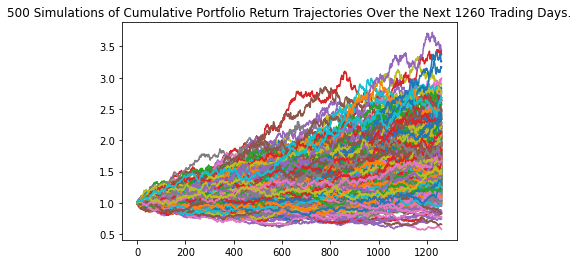

In [69]:
# Plotting simulation outcomes
er_5years_line_plot = mc_er_5years.plot_simulation()
# Saving the figure as an image to directory
er_5years_line_plot.get_figure().savefig("MC_5year_er_sim_plot.png", bbox_inches="tight")

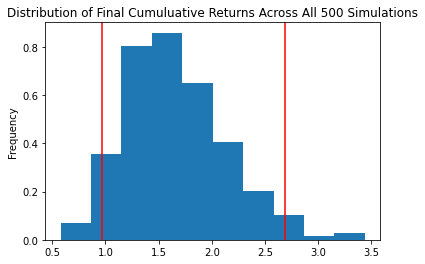

In [70]:
# Plotting probability distribution and confidence intervals
er_dist_plot_5years = mc_er_5years.plot_distribution()
# Saving the figure as an image to directory
er_dist_plot_5years.get_figure().savefig('MC_5year_dist_plot_er.png', bbox_inches='tight')

In [35]:
# Fetching summary statistics from the Monte Carlo simulation results
er_5years_tbl = mc_er_5years.summarize_cumulative_return()
# Printing summary statistics
print(er_5years_tbl)

count           500.000000
mean              1.661099
std               0.467508
min               0.577665
25%               1.319671
50%               1.590789
75%               1.933271
max               3.439988
95% CI Lower      0.964833
95% CI Upper      2.684558
Name: 1260, dtype: float64


In [36]:
# Setting initial investment
initial_investments = 60000

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
er_5year_ci_lower = round(er_5years_tbl[8]*initial_investments,2)
er_5year_ci_upper = round(er_5years_tbl[9]*initial_investments,2)

# Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investments} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${er_5year_ci_lower} and ${er_5year_ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57890.01 and $161073.47


### Five Years Retirement Option Initial Investments (30K) Different Weights (.60, .40)

In [37]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns with weights .60, .40, er = early retirement, wc = weight change
num_sims = 500
mc_er_wc_5years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = num_sims,
    num_trading_days = 252*5
)
mc_er_wc_5years.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-12-20 00:00:00-05:00  108.75  108.880  108.7059  108.770  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.870  108.7300  108.830  2173058.0   
2017-12-22 00:00:00-05:00  108.82  108.890  108.8100  108.880  2952430.0   
2017-12-26 00:00:00-05:00  108.91  109.010  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.325  109.0200  109.285  1863189.0   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-12-20 00:00:00-05:00          NaN     NaN      NaN      NaN     NaN   
2017-12-21 00:00:00-05:00     0.000552  267.73  268.385  267.300  267.57   
2017-12-22 00:00:00-05:00     0.000459  267.60  267.635  266.900  267.48   
2017-12-26 00:00:00-05:00     0.000735  267.06  267.390  266.885  267.17   
2017-12-27 00:00:00-05:00     0.002983  267.36  267.730  267.010  267.33   

                                                    
                               volume daily_return  
time                                                
2017-12-20 00:00:00-05:00         NaN          NaN  
2017-12-21 00:00:00-05:00  34999954.0          NaN  
2017-12-22 00:00:00-05:00  36604044.0    -0.000336  
2017-12-26 00:00:00-05:00  24888478.0    -0.001159  
2017-12-27 00:00:00-05:00  32573906.0     0.000599

In [38]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_er_wc_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\xElio\Desktop\FinTech\week5\Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992531,1.002587,1.002786,0.996317,0.994911,0.996873,1.001916,0.998801,1.008191,1.003412,...,0.999437,0.994454,1.000363,0.995096,1.006474,0.999444,0.998403,0.998337,0.984137,0.999368
2,0.995626,0.999716,0.996105,0.996625,0.988098,0.991603,0.995356,1.001238,1.017537,1.012511,...,1.004200,0.999935,0.993414,0.984027,1.012160,1.001204,0.991714,0.999029,0.982314,0.999196
3,0.993599,0.999841,0.999282,0.991515,0.990722,0.991151,0.984299,1.008403,1.022756,1.017670,...,1.010751,1.009480,0.990265,0.980306,1.008231,1.003644,1.002008,0.989807,0.976076,1.000352
4,0.993928,0.995404,1.004127,0.990064,0.988338,0.993053,0.986857,1.014106,1.026177,1.012936,...,1.002827,1.012108,0.989569,0.990764,0.996734,1.006815,0.997185,0.988236,0.980587,1.003943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.149635,1.630840,2.165818,1.333954,1.401527,1.227427,1.426409,1.472427,1.955991,1.466739,...,1.067737,2.026594,1.482355,0.968089,1.828270,1.495736,1.386013,1.824820,1.468465,1.427436
1257,2.149080,1.632828,2.159210,1.340783,1.421162,1.224811,1.417168,1.488624,1.955805,1.475736,...,1.079651,2.047837,1.491950,0.961825,1.812238,1.516623,1.378182,1.829623,1.478123,1.431205
1258,2.132377,1.641752,2.153917,1.345342,1.411823,1.213382,1.410546,1.505750,1.954981,1.469083,...,1.078051,2.053867,1.497687,0.967742,1.811668,1.506223,1.381701,1.835701,1.471066,1.419507
1259,2.121853,1.640067,2.153724,1.335862,1.391732,1.218067,1.400529,1.503156,1.928722,1.466846,...,1.072506,2.069040,1.500294,0.970009,1.839866,1.506131,1.373590,1.835875,1.477319,1.416662


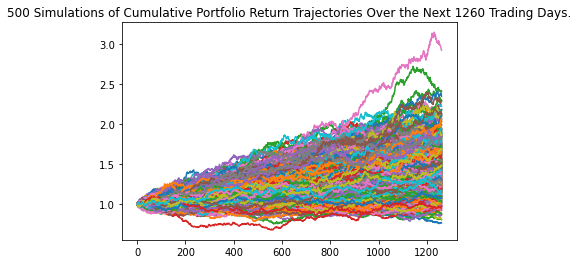

In [71]:
# Plotting simulation outcomes
er_wc_5years_line_plot = mc_er_wc_5years.plot_simulation()
# Saving the figure as an image to directory
er_wc_5years_line_plot.get_figure().savefig("MC_5year_er_wc_sim_plot.png", bbox_inches="tight")

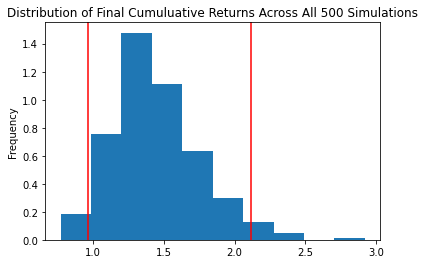

In [72]:
# Plotting probability distribution and confidence intervals
er_wc_dist_plot_5years = mc_er_wc_5years.plot_distribution()
# Saving the figure as an image to directory
er_wc_dist_plot_5years.get_figure().savefig('MC_5year_dist_plot_er_wc.png', bbox_inches='tight')

In [41]:
# Fetching summary statistics from the Monte Carlo simulation results
er_wc_5years_tbl = mc_er_wc_5years.summarize_cumulative_return()
# Printing summary statistics
print(er_wc_5years_tbl)

count           500.000000
mean              1.442289
std               0.298191
min               0.768470
25%               1.242681
50%               1.403249
75%               1.609295
max               2.919943
95% CI Lower      0.965889
95% CI Upper      2.118031
Name: 1260, dtype: float64


In [42]:
# Setting initial investment
initial_investments = 30000

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
er_wc_5year_ci_lower = round(er_wc_5years_tbl[8]*initial_investments,2)
er_wc_5year_ci_upper = round(er_wc_5years_tbl[9]*initial_investments,2)

# Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investments} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${er_wc_5year_ci_lower} and ${er_wc_5year_ci_upper}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 5 years will end within in the range of $28976.68 and $63540.92


### Five Years Retirement Option Initial Investment (60K) Weights (.30, .70)

In [43]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns with weights .60, .40, er = early retirement, wc = weight change
num_sims = 500
mc_er_wc_5years1 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = num_sims,
    num_trading_days = 252*5
)
mc_er_wc_5years1.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-12-20 00:00:00-05:00  108.75  108.880  108.7059  108.770  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.870  108.7300  108.830  2173058.0   
2017-12-22 00:00:00-05:00  108.82  108.890  108.8100  108.880  2952430.0   
2017-12-26 00:00:00-05:00  108.91  109.010  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.325  109.0200  109.285  1863189.0   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-12-20 00:00:00-05:00          NaN     NaN      NaN      NaN     NaN   
2017-12-21 00:00:00-05:00     0.000552  267.73  268.385  267.300  267.57   
2017-12-22 00:00:00-05:00     0.000459  267.60  267.635  266.900  267.48   
2017-12-26 00:00:00-05:00     0.000735  267.06  267.390  266.885  267.17   
2017-12-27 00:00:00-05:00     0.002983  267.36  267.730  267.010  267.33   

                                                    
                               volume daily_return  
time                                                
2017-12-20 00:00:00-05:00         NaN          NaN  
2017-12-21 00:00:00-05:00  34999954.0          NaN  
2017-12-22 00:00:00-05:00  36604044.0    -0.000336  
2017-12-26 00:00:00-05:00  24888478.0    -0.001159  
2017-12-27 00:00:00-05:00  32573906.0     0.000599

In [44]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_er_wc_5years1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\xElio\Desktop\FinTech\week5\Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001246,0.995131,1.004210,1.000419,0.998381,1.008348,0.997409,1.000001,0.997383,0.993188,...,1.003801,0.994882,0.998896,0.991154,0.987852,1.001236,1.011668,1.001409,1.012573,0.994232
2,0.991079,0.995310,0.995556,1.000033,1.025189,1.019337,0.994507,1.001107,0.994212,0.983776,...,0.992233,0.987694,0.996553,1.003938,0.979189,1.017620,1.012659,0.992717,1.010151,1.005251
3,0.985527,0.989349,1.004801,0.996269,1.043129,1.012664,0.982094,0.992263,0.998582,0.994114,...,0.985384,0.983140,0.978723,1.006450,0.971154,1.022312,1.016374,1.003873,1.005715,1.005696
4,0.960706,0.987579,1.001770,1.016185,1.033878,1.026614,0.967897,0.979931,1.007431,0.991699,...,0.988226,0.989821,0.981314,1.009064,0.974681,1.005959,1.002740,1.011123,1.003554,0.989479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.235100,3.111790,2.423335,1.859239,1.695202,1.890616,2.615462,1.621718,2.260390,0.771440,...,1.375994,1.391511,1.374268,1.380954,1.894303,1.369122,1.569533,1.757306,1.751776,3.425882
1257,1.232067,3.045302,2.434598,1.848805,1.697882,1.926334,2.607985,1.613686,2.263234,0.771839,...,1.359388,1.386129,1.359330,1.377822,1.893327,1.379601,1.576627,1.753532,1.762293,3.434127
1258,1.245777,3.013138,2.408771,1.856679,1.675888,1.934809,2.618228,1.606108,2.291168,0.761928,...,1.384099,1.369490,1.351056,1.406627,1.874770,1.382699,1.601334,1.750073,1.804205,3.409337
1259,1.247119,3.052728,2.406082,1.857764,1.637832,1.913714,2.603802,1.593091,2.284742,0.765160,...,1.395740,1.370935,1.331512,1.409740,1.851907,1.389360,1.577517,1.777407,1.790919,3.456130


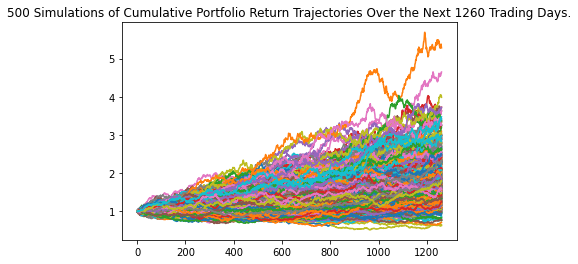

In [73]:
# Plotting simulation outcomes
er_wc_5years_line_plot1 = mc_er_wc_5years1.plot_simulation()
# Saving the figure as an image to directory
er_wc_5years_line_plot1.get_figure().savefig("MC_5year_er_wc_sim_plot1.png", bbox_inches="tight")

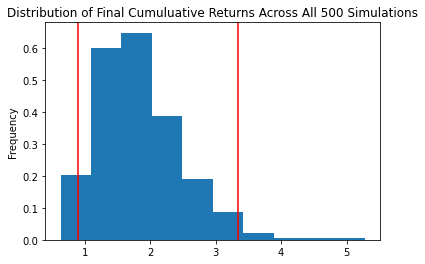

In [74]:
# Plotting probability distribution and confidence intervals
er_wc_dist_plot_5years1 = mc_er_wc_5years1.plot_distribution()
# Saving the figure as an image to directory
er_wc_dist_plot_5years1.get_figure().savefig('MC_5year_dist_plot_er_wc1.png', bbox_inches='tight')

In [47]:
# Fetching summary statistics from the Monte Carlo simulation results
er_wc_5years_tbl1 = mc_er_wc_5years1.summarize_cumulative_return()
# Printing summary statistics
print(er_wc_5years_tbl1)

count           500.000000
mean              1.834012
std               0.639797
min               0.628815
25%               1.376981
50%               1.718510
75%               2.232140
max               5.279302
95% CI Lower      0.899387
95% CI Upper      3.334692
Name: 1260, dtype: float64


In [48]:
# Setting initial investment
initial_investments = 60000

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
er_wc_5year_ci_lower1 = round(er_wc_5years_tbl1[8]*initial_investments,2)
er_wc_5year_ci_upper1 = round(er_wc_5years_tbl1[9]*initial_investments,2)

# Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investments} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${er_wc_5year_ci_lower1} and ${er_wc_5year_ci_upper1}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53963.22 and $200081.52


### Ten Years Retirement Option Initial Investment (60K) Weights (.40, .60)

In [49]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns with same weights .40, .60 er = early retirement
num_sims = 500
mc_er_10years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*10
)
# Printing with portfolio_data
mc_er_10years.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-12-20 00:00:00-05:00  108.75  108.880  108.7059  108.770  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.870  108.7300  108.830  2173058.0   
2017-12-22 00:00:00-05:00  108.82  108.890  108.8100  108.880  2952430.0   
2017-12-26 00:00:00-05:00  108.91  109.010  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.325  109.0200  109.285  1863189.0   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-12-20 00:00:00-05:00          NaN     NaN      NaN      NaN     NaN   
2017-12-21 00:00:00-05:00     0.000552  267.73  268.385  267.300  267.57   
2017-12-22 00:00:00-05:00     0.000459  267.60  267.635  266.900  267.48   
2017-12-26 00:00:00-05:00     0.000735  267.06  267.390  266.885  267.17   
2017-12-27 00:00:00-05:00     0.002983  267.36  267.730  267.010  267.33   

                                                    
                               volume daily_return  
time                                                
2017-12-20 00:00:00-05:00         NaN          NaN  
2017-12-21 00:00:00-05:00  34999954.0          NaN  
2017-12-22 00:00:00-05:00  36604044.0    -0.000336  
2017-12-26 00:00:00-05:00  24888478.0    -0.001159  
2017-12-27 00:00:00-05:00  32573906.0     0.000599

In [50]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_er_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\xElio\Desktop\FinTech\week5\Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016619,1.008165,1.006044,0.999887,0.993184,0.998164,1.000849,1.001518,0.998001,1.008260,...,1.007412,1.001490,1.013144,1.006502,0.999019,0.993121,0.998336,0.999485,0.999263,1.001780
2,1.019331,0.999210,0.987006,0.993067,0.986489,0.993314,1.011911,1.011109,0.997281,1.007118,...,1.012785,1.009139,1.016793,1.018959,0.988803,1.003290,0.988750,0.996882,0.989524,0.994378
3,1.019754,1.005425,0.972425,0.986930,0.967027,0.991627,1.010050,1.007608,0.996446,1.010793,...,1.023976,1.008797,1.018502,1.023201,0.984110,0.991860,0.983066,0.997708,0.996875,0.998534
4,1.027037,1.008971,0.972420,0.994558,0.967677,0.992021,1.009770,1.006846,1.003351,1.014382,...,1.037887,0.999352,1.001797,1.027947,0.975719,0.983074,0.983032,0.995079,1.004555,0.999469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.447224,2.809664,2.340799,1.907761,2.285864,2.001631,3.788355,3.197215,2.215403,3.638434,...,1.196122,2.808259,2.960802,2.588703,2.450234,1.546592,2.274774,1.740108,1.955219,2.143905
2517,3.438856,2.820618,2.353175,1.899553,2.268616,2.012988,3.764250,3.220773,2.213682,3.581146,...,1.196054,2.820649,2.969051,2.568057,2.461516,1.535928,2.279316,1.745383,1.939934,2.134145
2518,3.474793,2.793779,2.365925,1.894779,2.293918,2.027500,3.736887,3.253534,2.237417,3.552248,...,1.184178,2.819351,2.997272,2.587075,2.478364,1.536150,2.261294,1.749910,1.943027,2.116938
2519,3.489200,2.810731,2.356691,1.858774,2.295505,1.969381,3.776891,3.303092,2.236607,3.531228,...,1.191264,2.850348,2.999658,2.591545,2.476016,1.529127,2.248641,1.733749,1.927284,2.128360


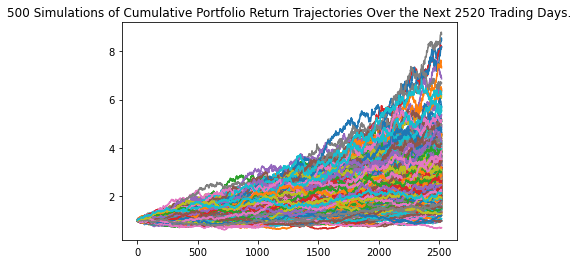

In [75]:
# Plotting simulation outcomes
er_10years_line_plot = mc_er_10years.plot_simulation()
# Saving the figure as an image to directory 
er_10years_line_plot.get_figure().savefig("MC_10year_early_retirement_er.png", bbox_inches="tight")

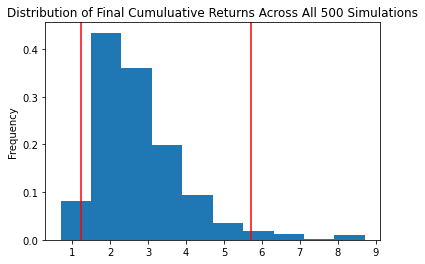

In [76]:
# Plotting probability distribution and confidence intervals
er_dist_plot_10years = mc_er_10years.plot_distribution()
# Saving the figure as an image to directory 
er_dist_plot_10years.get_figure().savefig('MC_10year_dist_plot_er.png', bbox_inches='tight')

In [53]:
# Fetching summary statistics from the Monte Carlo simulation results
er_10years_tbl = mc_er_10years.summarize_cumulative_return()
# Printing summary statistics
print(er_10years_tbl)

count           500.000000
mean              2.775351
std               1.191359
min               0.695945
25%               1.962985
50%               2.512678
75%               3.295269
max               8.713338
95% CI Lower      1.236687
95% CI Upper      5.710754
Name: 2520, dtype: float64


In [54]:
# Setting initial investment
initial_investments = 60000

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
er_10year_ci_lower = round(er_10years_tbl[8]*initial_investments,2)
er_10year_ci_upper = round(er_10years_tbl[9]*initial_investments,2)

# Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investments} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${er_10year_ci_lower} and ${er_10year_ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $74201.24 and $342645.26


### Ten Years Retirement Option Initial Investment (30K) Weights (.60, .40)

In [55]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns with same weights .40, .60 er = early retirement, wc = weight change
num_sims = 500
mc_er_wc_10years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = num_sims,
    num_trading_days = 252*10
)
# Printing with portfolio_data
mc_er_wc_10years.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-12-20 00:00:00-05:00  108.75  108.880  108.7059  108.770  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.870  108.7300  108.830  2173058.0   
2017-12-22 00:00:00-05:00  108.82  108.890  108.8100  108.880  2952430.0   
2017-12-26 00:00:00-05:00  108.91  109.010  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.325  109.0200  109.285  1863189.0   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-12-20 00:00:00-05:00          NaN     NaN      NaN      NaN     NaN   
2017-12-21 00:00:00-05:00     0.000552  267.73  268.385  267.300  267.57   
2017-12-22 00:00:00-05:00     0.000459  267.60  267.635  266.900  267.48   
2017-12-26 00:00:00-05:00     0.000735  267.06  267.390  266.885  267.17   
2017-12-27 00:00:00-05:00     0.002983  267.36  267.730  267.010  267.33   

                                                    
                               volume daily_return  
time                                                
2017-12-20 00:00:00-05:00         NaN          NaN  
2017-12-21 00:00:00-05:00  34999954.0          NaN  
2017-12-22 00:00:00-05:00  36604044.0    -0.000336  
2017-12-26 00:00:00-05:00  24888478.0    -0.001159  
2017-12-27 00:00:00-05:00  32573906.0     0.000599

In [56]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_er_wc_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\xElio\Desktop\FinTech\week5\Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986465,0.995533,1.000671,0.994000,0.998085,0.999538,0.998573,1.006236,0.995328,0.991113,...,0.992181,1.002236,1.001859,0.999007,0.996562,1.001119,0.998542,1.006850,1.010846,0.997262
2,0.982394,1.003112,1.012136,0.998349,0.999055,0.993604,1.016381,1.005399,0.992746,0.993206,...,0.989852,1.000285,1.000865,0.996557,0.999969,1.006609,0.999779,1.012677,1.014086,0.991356
3,0.987430,1.009687,1.017122,0.993301,0.999242,1.007303,1.020537,1.011906,0.998043,0.992900,...,0.998764,1.005949,1.003472,0.996572,1.001982,1.010623,1.001451,1.004136,1.013108,1.006341
4,0.981010,1.013888,1.012753,0.992958,0.998281,1.009167,1.014743,0.995429,0.999568,0.996905,...,0.998492,1.005632,1.004214,1.004700,1.000657,1.014835,1.002429,1.007612,1.017184,0.995948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.823879,1.928159,1.852363,1.196504,1.848892,1.534596,1.194098,1.833456,2.043347,1.577245,...,1.983460,1.410783,1.808998,1.751557,3.221160,3.100463,2.141261,2.221435,3.357951,2.021776
2517,1.815567,1.927021,1.862055,1.199230,1.856036,1.523524,1.189032,1.843330,2.052284,1.585918,...,1.974466,1.398745,1.795405,1.755017,3.199477,3.102170,2.119358,2.211978,3.367239,2.029656
2518,1.822834,1.909441,1.863749,1.193087,1.847118,1.522656,1.190083,1.854612,2.052231,1.584600,...,1.978781,1.401177,1.777015,1.764932,3.207933,3.124273,2.121493,2.204501,3.399989,2.048909
2519,1.830647,1.912011,1.877907,1.183070,1.871131,1.521673,1.195561,1.833589,2.037537,1.593840,...,1.985643,1.417579,1.775626,1.767858,3.208956,3.138604,2.111640,2.200481,3.420365,2.025676


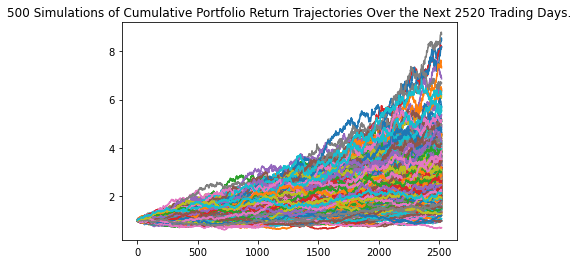

In [77]:
# Plotting simulation outcomes
er_wc_10years_line_plot = mc_er_10years.plot_simulation()
# Saving the figure as an image to directory 
er_wc_10years_line_plot.get_figure().savefig("MC_10year_early_retirement_sim_plot.png", bbox_inches="tight")

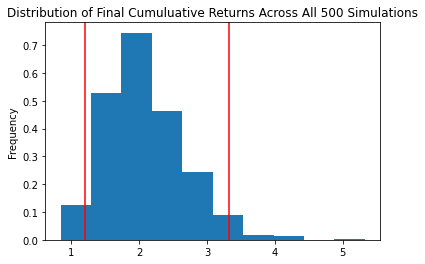

In [78]:
# Plotting probability distribution and confidence intervals
er_wc_dist_plot_10years = mc_er_wc_10years.plot_distribution()
# Saving the figure as an image to directory 
er_wc_dist_plot_10years.get_figure().savefig('MC_10year_dist_plot_er_wc.png', bbox_inches='tight')

In [59]:
# Fetching summary statistics from the Monte Carlo simulation results
er_wc_10years_tbl = mc_er_wc_10years.summarize_cumulative_return()
# Printing summary statistics
print(er_wc_10years_tbl)

count           500.000000
mean              2.085388
std               0.589018
min               0.841129
25%               1.683056
50%               1.998859
75%               2.397019
max               5.325418
95% CI Lower      1.202026
95% CI Upper      3.324716
Name: 2520, dtype: float64


In [60]:
# Setting initial investment
initial_investments = 30000

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
er_wc_10year_ci_lower = round(er_wc_10years_tbl[8]*initial_investments,2)
er_wc_10year_ci_upper = round(er_wc_10years_tbl[9]*initial_investments,2)

# Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investments} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${er_wc_10year_ci_lower} and ${er_wc_10year_ci_upper}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 10 years will end within in the range of $36060.78 and $99741.47


### Ten Years Retirement Option Initial Investment (60K) Weights (.30, .70)

In [61]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns with same weights .40, .60 er = early retirement, wc = weight change
num_sims = 500
mc_er_wc_10years1 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = num_sims,
    num_trading_days = 252*10
)
# Printing with portfolio_data
mc_er_wc_10years1.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-12-20 00:00:00-05:00  108.75  108.880  108.7059  108.770  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.870  108.7300  108.830  2173058.0   
2017-12-22 00:00:00-05:00  108.82  108.890  108.8100  108.880  2952430.0   
2017-12-26 00:00:00-05:00  108.91  109.010  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.325  109.0200  109.285  1863189.0   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-12-20 00:00:00-05:00          NaN     NaN      NaN      NaN     NaN   
2017-12-21 00:00:00-05:00     0.000552  267.73  268.385  267.300  267.57   
2017-12-22 00:00:00-05:00     0.000459  267.60  267.635  266.900  267.48   
2017-12-26 00:00:00-05:00     0.000735  267.06  267.390  266.885  267.17   
2017-12-27 00:00:00-05:00     0.002983  267.36  267.730  267.010  267.33   

                                                    
                               volume daily_return  
time                                                
2017-12-20 00:00:00-05:00         NaN          NaN  
2017-12-21 00:00:00-05:00  34999954.0          NaN  
2017-12-22 00:00:00-05:00  36604044.0    -0.000336  
2017-12-26 00:00:00-05:00  24888478.0    -0.001159  
2017-12-27 00:00:00-05:00  32573906.0     0.000599

In [62]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_er_wc_10years1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\xElio\Desktop\FinTech\week5\Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998602,1.002362,0.997260,0.994090,1.001697,1.000971,1.008891,1.002151,0.993997,1.000830,...,1.010358,0.995761,0.991792,0.994208,1.010413,0.998281,0.996559,1.003300,1.002487,0.998902
2,0.991687,0.992454,1.001059,0.992480,0.996387,1.000228,1.005686,1.005927,0.992205,1.002675,...,1.015415,0.996903,0.983597,0.997303,1.010599,1.012023,1.002082,0.999627,0.992353,1.007029
3,0.982995,0.991260,1.005499,0.987177,0.988256,1.007753,1.015095,1.004144,0.997765,1.004256,...,1.024634,0.993017,0.983078,0.998358,1.010195,1.016451,1.002993,0.997622,0.980981,1.013132
4,0.986144,1.001885,1.011992,0.982330,0.986167,1.019808,1.017917,1.011489,0.987331,0.991054,...,1.034134,0.999806,0.982583,1.005514,1.019694,1.019323,1.009652,1.001922,0.992038,0.999739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.828990,1.725716,1.502019,1.830333,1.476826,2.121728,2.276144,1.667185,2.620246,1.630511,...,1.988245,2.904319,1.939983,1.721212,1.154799,1.343383,2.002665,2.969432,2.361038,2.171514
2517,2.854150,1.724377,1.487686,1.829268,1.460755,2.133226,2.275544,1.674805,2.608304,1.633901,...,1.990386,2.902369,1.959134,1.709841,1.156209,1.337147,2.010013,2.974755,2.343151,2.170795
2518,2.842564,1.705857,1.485452,1.821366,1.449299,2.150071,2.277846,1.688911,2.603950,1.620793,...,1.979748,2.902644,1.964264,1.721000,1.147828,1.339050,2.007422,2.990022,2.329149,2.147762
2519,2.863507,1.697206,1.498767,1.819355,1.443935,2.134123,2.288919,1.686696,2.606494,1.622129,...,1.990307,2.904876,1.970577,1.720906,1.148568,1.336202,2.013218,3.003483,2.313990,2.152551


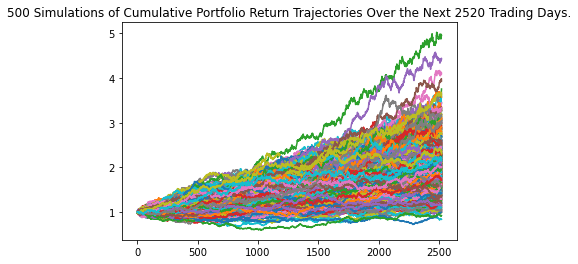

In [79]:
# Plotting simulation outcomes
er_wc_10years_line_plot1 = mc_er_wc_10years1.plot_simulation()
# Saving the figure as an image to directory 
er_wc_10years_line_plot1.get_figure().savefig("MC_10year_early_retirement_sim_plot1.png", bbox_inches="tight")

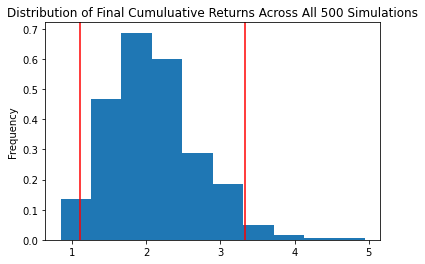

In [80]:
# Plotting probability distribution and confidence intervals
er_wc_dist_plot_10years1 = mc_er_wc_10years1.plot_distribution()
# Saving the figure as an image to directory 
er_wc_dist_plot_10years1.get_figure().savefig('MC_10year_dist_plot_er_wc1.png', bbox_inches='tight')

In [65]:
# Fetching summary statistics from the Monte Carlo simulation results
er_wc_10years_tbl1 = mc_er_wc_10years1.summarize_cumulative_return()
# Printing summary statistics
print(er_wc_10years_tbl1)

count           500.000000
mean              2.094427
std               0.598744
min               0.842820
25%               1.666223
50%               2.011601
75%               2.452075
max               4.947096
95% CI Lower      1.108112
95% CI Upper      3.330570
Name: 2520, dtype: float64


In [66]:
# Setting initial investment
initial_investments = 30000

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
er_wc_10year_ci_lower1 = round(er_wc_10years_tbl1[8]*initial_investments,2)
er_wc_10year_ci_upper1 = round(er_wc_10years_tbl1[9]*initial_investments,2)

# Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investments} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${er_wc_10year_ci_lower1} and ${er_wc_10year_ci_upper1}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 10 years will end within in the range of $33243.35 and $99917.09


## <span style="color:turquoise">Will Retirement in 5 to 10 years be Worthwhile</span>
   <span style="color:turquoise">
    Results: <br />
    5 years 60K .4, .6 = 55055.8 and 174635.1<br /> 
    5 years 30k .6, .4 = 28582.81 and 62827.89<br />
    5 years 60k .3, .7 = 47519.75 and 188081.76<br />
    10 years 60K .4, .6 = 68869.52 and 353270.87<br />
    10 years 30k .6, .4 = 37308.12 and 103537.13<br />
    10 years 60k .3, .7 = 35641.62 and 109215.55<br />
    30 years 20k .4, .6 = 89276.86 and 1581727.89<br />
    30 years 30k .4, .6 = 133915.29 and 2372591.83<br />
    Comparing all these results based on the ranges it would make most sense to choose the 30 years at 30K investment (0.4, 0.6) if they wish to have the most money and best retirement.<br />
    The next best option being 30 years 20k investment (0.4, 0.6) as this is still a large amount of savings.<br />
    If they were to choose the other options they are all about 1 million less dollars so would make no sense to try and retire within 5 to 10 years otherwise he would end up having little money       to survive and enjoy life with.
    </span>